In [ ]:
experiment_name = 'Clip16_DreamSim_Lora_Default_123_Third'

from google.colab import drive
drive.mount('/content/drive')

import logging
import os
import sys
import yaml
import joblib

# Project setup
PROJECT_ROOT = '/content/drive/MyDrive/perceptual-vits-fashion-forecasting'
sys.path.append(os.path.join(PROJECT_ROOT, 'src'))

# Load config
config_path = os.path.join(PROJECT_ROOT, 'configs', f"{experiment_name}.yaml")
if not os.path.isfile(config_path):
    raise FileNotFoundError(f"Config file not found: {config_path}")

with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

# Logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from data.process_visuelle import process_visuelle

# Process Visuelle2 data
results_process_visuelle = process_visuelle(
    season=config['data']['season'],
    split_method=config['data']['split_method'],
    melt_data=config['global']['melt_data'],
    project_root=config['global']['project_root']
)

[INFO] Starting Visuelle2 data processing...
[INFO] All processed files already exist. Skipping processing.


In [ ]:
from data.load_visuelle import load_visuelle

# Load dataset with embeddings for vanilla
dict_load_visuelle = load_visuelle(
    process_data_dict=results_process_visuelle,
    embedding_path='/content/drive/MyDrive/perceptual-vits-fashion-forecasting/datasets/visuelle2/embeddings/Dinov1_vitb16_Vanilla_First_Model_dino_vitb16_no_training_cls_16_none_embeddings.csv',
    using_year_int=config['features']['using_year_int'],
    using_year_dummies=config['features']['using_year_dummies'],
    using_season_dummies=config['features']['using_season_dummies'],
    using_price_float=config['features']['using_price_float'],
    using_category_dummies=config['features']['using_category_dummies'],
    using_color_dummies=config['features']['using_color_dummies'],
    using_fabric_dummies=config['features']['using_fabric_dummies'],
    using_store_int=config['features']['using_store_int'],
    using_store_dummies=config['features']['using_store_dummies'],
    using_week_dummies=config['features']['using_week_dummies'],
    pca=config['features']['pca'],
    n_components=config['features']['n_components'],
    visualize_pca=config['features']['visualize_pca'],
    melt_data=config['global']['melt_data'],
    dummy_normalization=config['forecasting']['knn']['dummy_normalization'],
    normalize_embeddings_manually=config['forecasting']['knn']['normalize_embeddings_manually'],
    project_root=config['global']['project_root']
)

[INFO] Loading and preparing Visuelle2 dataset...
[INFO] Load training data from /content/drive/MyDrive/perceptual-vits-fashion-forecasting/datasets/visuelle2/processed_data/melt_true_aw19_default_split/visuelle2_train.csv
[INFO] Load validation data from /content/drive/MyDrive/perceptual-vits-fashion-forecasting/datasets/visuelle2/processed_data/melt_true_aw19_default_split/visuelle2_val.csv
[INFO] Load test data from /content/drive/MyDrive/perceptual-vits-fashion-forecasting/datasets/visuelle2/processed_data/melt_true_aw19_default_split/visuelle2_test.csv
[INFO] Load embeddings from /content/drive/MyDrive/perceptual-vits-fashion-forecasting/datasets/visuelle2/embeddings/Dinov1_vitb16_Vanilla_First_Model_dino_vitb16_no_training_cls_16_none_embeddings.csv
[INFO] Length of training data before merging is 51444 rows.
[INFO] Length of training data after merging is 51432 rows.
[INFO] Length of validation data before merging is 6408 rows.
[INFO] Length of validation data after merging is 6

In [ ]:
import pandas as pd
import numpy as np

test_df = pd.read_csv(results_process_visuelle['dataset_paths']['test_data_path'])
test_df_short = test_df[['external_code', 'week', 'image_path', 'sales_sum']]

### DINOv1 Vanilla Models ###
# kNN Regression
vanilla_knn = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_Vanilla_Default_123/forecasts_knn_regressor_model.npy')
# Ridge Regression
vanilla_ridge = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_Vanilla_Default_123/forecasts_ridge_regressor_model.npy')
# Random Forest
vanilla_rf = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_Vanilla_Default_123/forecasts_random_forest_regressor_model.npy')
# Gradient Boosting
vanilla_gb = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_Vanilla_Default_123/forecasts_gradient_boosting_regressor_model.npy')


### DINOv1 NIGHTS Models ###
# knn Regression
nights_knn_first = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_NIGHTS_Lora_Default_123_First/forecasts_knn_regressor_model.npy')
nights_knn_second = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_NIGHTS_Lora_Default_123_Second/forecasts_knn_regressor_model.npy')
nights_knn_third = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_NIGHTS_Lora_Default_123_Third/forecasts_knn_regressor_model.npy')
nights_gb = (nights_knn_first + nights_knn_second + nights_knn_third) / 3
# Ridge Regression
nights_ridge_first = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_NIGHTS_Lora_Default_123_First/forecasts_ridge_regressor_model.npy')
nights_ridge_second = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_NIGHTS_Lora_Default_123_Second/forecasts_ridge_regressor_model.npy')
nights_ridge_third = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_NIGHTS_Lora_Default_123_Third/forecasts_ridge_regressor_model.npy')
nights_ridge = (nights_ridge_first + nights_ridge_second + nights_ridge_third) / 3
# Random Forest
nights_rf_first = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_NIGHTS_Lora_Default_123_First/forecasts_random_forest_regressor_model.npy')
nights_rf_second = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_NIGHTS_Lora_Default_123_Second/forecasts_random_forest_regressor_model.npy')
nights_rf_third = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_NIGHTS_Lora_Default_123_Third/forecasts_random_forest_regressor_model.npy')
nights_rf = (nights_rf_first + nights_rf_second + nights_rf_third) / 3
# Gradient Boosting
nights_gb_first = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_NIGHTS_Lora_Default_123_First/forecasts_gradient_boosting_regressor_model.npy')
nights_gb_second = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_NIGHTS_Lora_Default_123_Second/forecasts_gradient_boosting_regressor_model.npy')
nights_gb_third = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_NIGHTS_Lora_Default_123_Third/forecasts_gradient_boosting_regressor_model.npy')
nights_gb = (nights_gb_first + nights_gb_second + nights_gb_third) / 3


### DINOv1 FT Models ###
# knn Regression
ft_knn_first = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_FT_Lora_Default_123_First/forecasts_knn_regressor_model.npy')
ft_knn_second = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_FT_Lora_Default_123_Second/forecasts_knn_regressor_model.npy')
ft_knn_third = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_FT_Lora_Default_123_Third/forecasts_knn_regressor_model.npy')
ft_gb = (ft_knn_first + ft_knn_second + ft_knn_third) / 3
# Ridge Regression
ft_ridge_first = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_FT_Lora_Default_123_First/forecasts_ridge_regressor_model.npy')
ft_ridge_second = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_FT_Lora_Default_123_Second/forecasts_ridge_regressor_model.npy')
ft_ridge_third = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_FT_Lora_Default_123_Third/forecasts_ridge_regressor_model.npy')
ft_ridge = (ft_ridge_first + ft_ridge_second + ft_ridge_third) / 3
# Random Forest
ft_rf_first = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_FT_Lora_Default_123_First/forecasts_random_forest_regressor_model.npy')
ft_rf_second = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_FT_Lora_Default_123_Second/forecasts_random_forest_regressor_model.npy')
ft_rf_third = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_FT_Lora_Default_123_Third/forecasts_random_forest_regressor_model.npy')
ft_rf = (ft_rf_first + ft_rf_second + ft_rf_third) / 3
# Gradient Boosting
ft_gb_first = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_FT_Lora_Default_123_First/forecasts_gradient_boosting_regressor_model.npy')
ft_gb_second = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_FT_Lora_Default_123_Second/forecasts_gradient_boosting_regressor_model.npy')
ft_gb_third = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/experiments/forecasts/Dinov1_vitb16_FT_Lora_Default_123_Third/forecasts_gradient_boosting_regressor_model.npy')
ft_gb = (ft_gb_first + ft_gb_second + ft_gb_third) / 3

# Scalar
scalar = np.load('/content/drive/MyDrive/perceptual-vits-fashion-forecasting/datasets/visuelle2/stfore_sales_norm_scalar.npy')

In [ ]:
# Create data frame
# Re-create test_df_short to ensure it has the correct columns for this cell
test_df_short = test_df[['external_code', 'week', 'image_path', 'sales_sum']].copy()

df = pd.DataFrame({
    'external_code': test_df_short['external_code'],
    'week': test_df_short['week'],
    'image_path': test_df_short['image_path'],
    'true_sales': test_df_short['sales_sum'],

    'vanilla_knn': vanilla_knn,
    'nights_knn': nights_knn_third,
    'ft_knn': ft_knn_third,

    'vanilla_ridge': vanilla_ridge,
    'nights_ridge': nights_ridge,
    'ft_ridge': ft_ridge,

    'vanilla_rf': vanilla_rf,
    'nights_rf': nights_rf,
    'ft_rf': ft_rf,

    'vanilla_gb': vanilla_gb,
    'nights_gb': nights_gb,
    'ft_gb': ft_gb
})

# Scale up the sales numbers
df['true_sales'] = df['true_sales'] * scalar
df['vanilla_knn'] = df['vanilla_knn'] * scalar
df['nights_knn'] = df['nights_knn'] * scalar
df['ft_knn'] = df['ft_knn'] * scalar
df['vanilla_ridge'] = df['vanilla_ridge'] * scalar
df['nights_ridge'] = df['nights_ridge'] * scalar
df['ft_ridge'] = df['ft_ridge'] * scalar
df['vanilla_rf'] = df['vanilla_rf'] * scalar
df['nights_rf'] = df['nights_rf'] * scalar
df['ft_rf'] = df['ft_rf'] * scalar
df['vanilla_gb'] = df['vanilla_gb'] * scalar
df['nights_gb'] = df['nights_gb'] * scalar
df['ft_gb'] = df['ft_gb'] * scalar

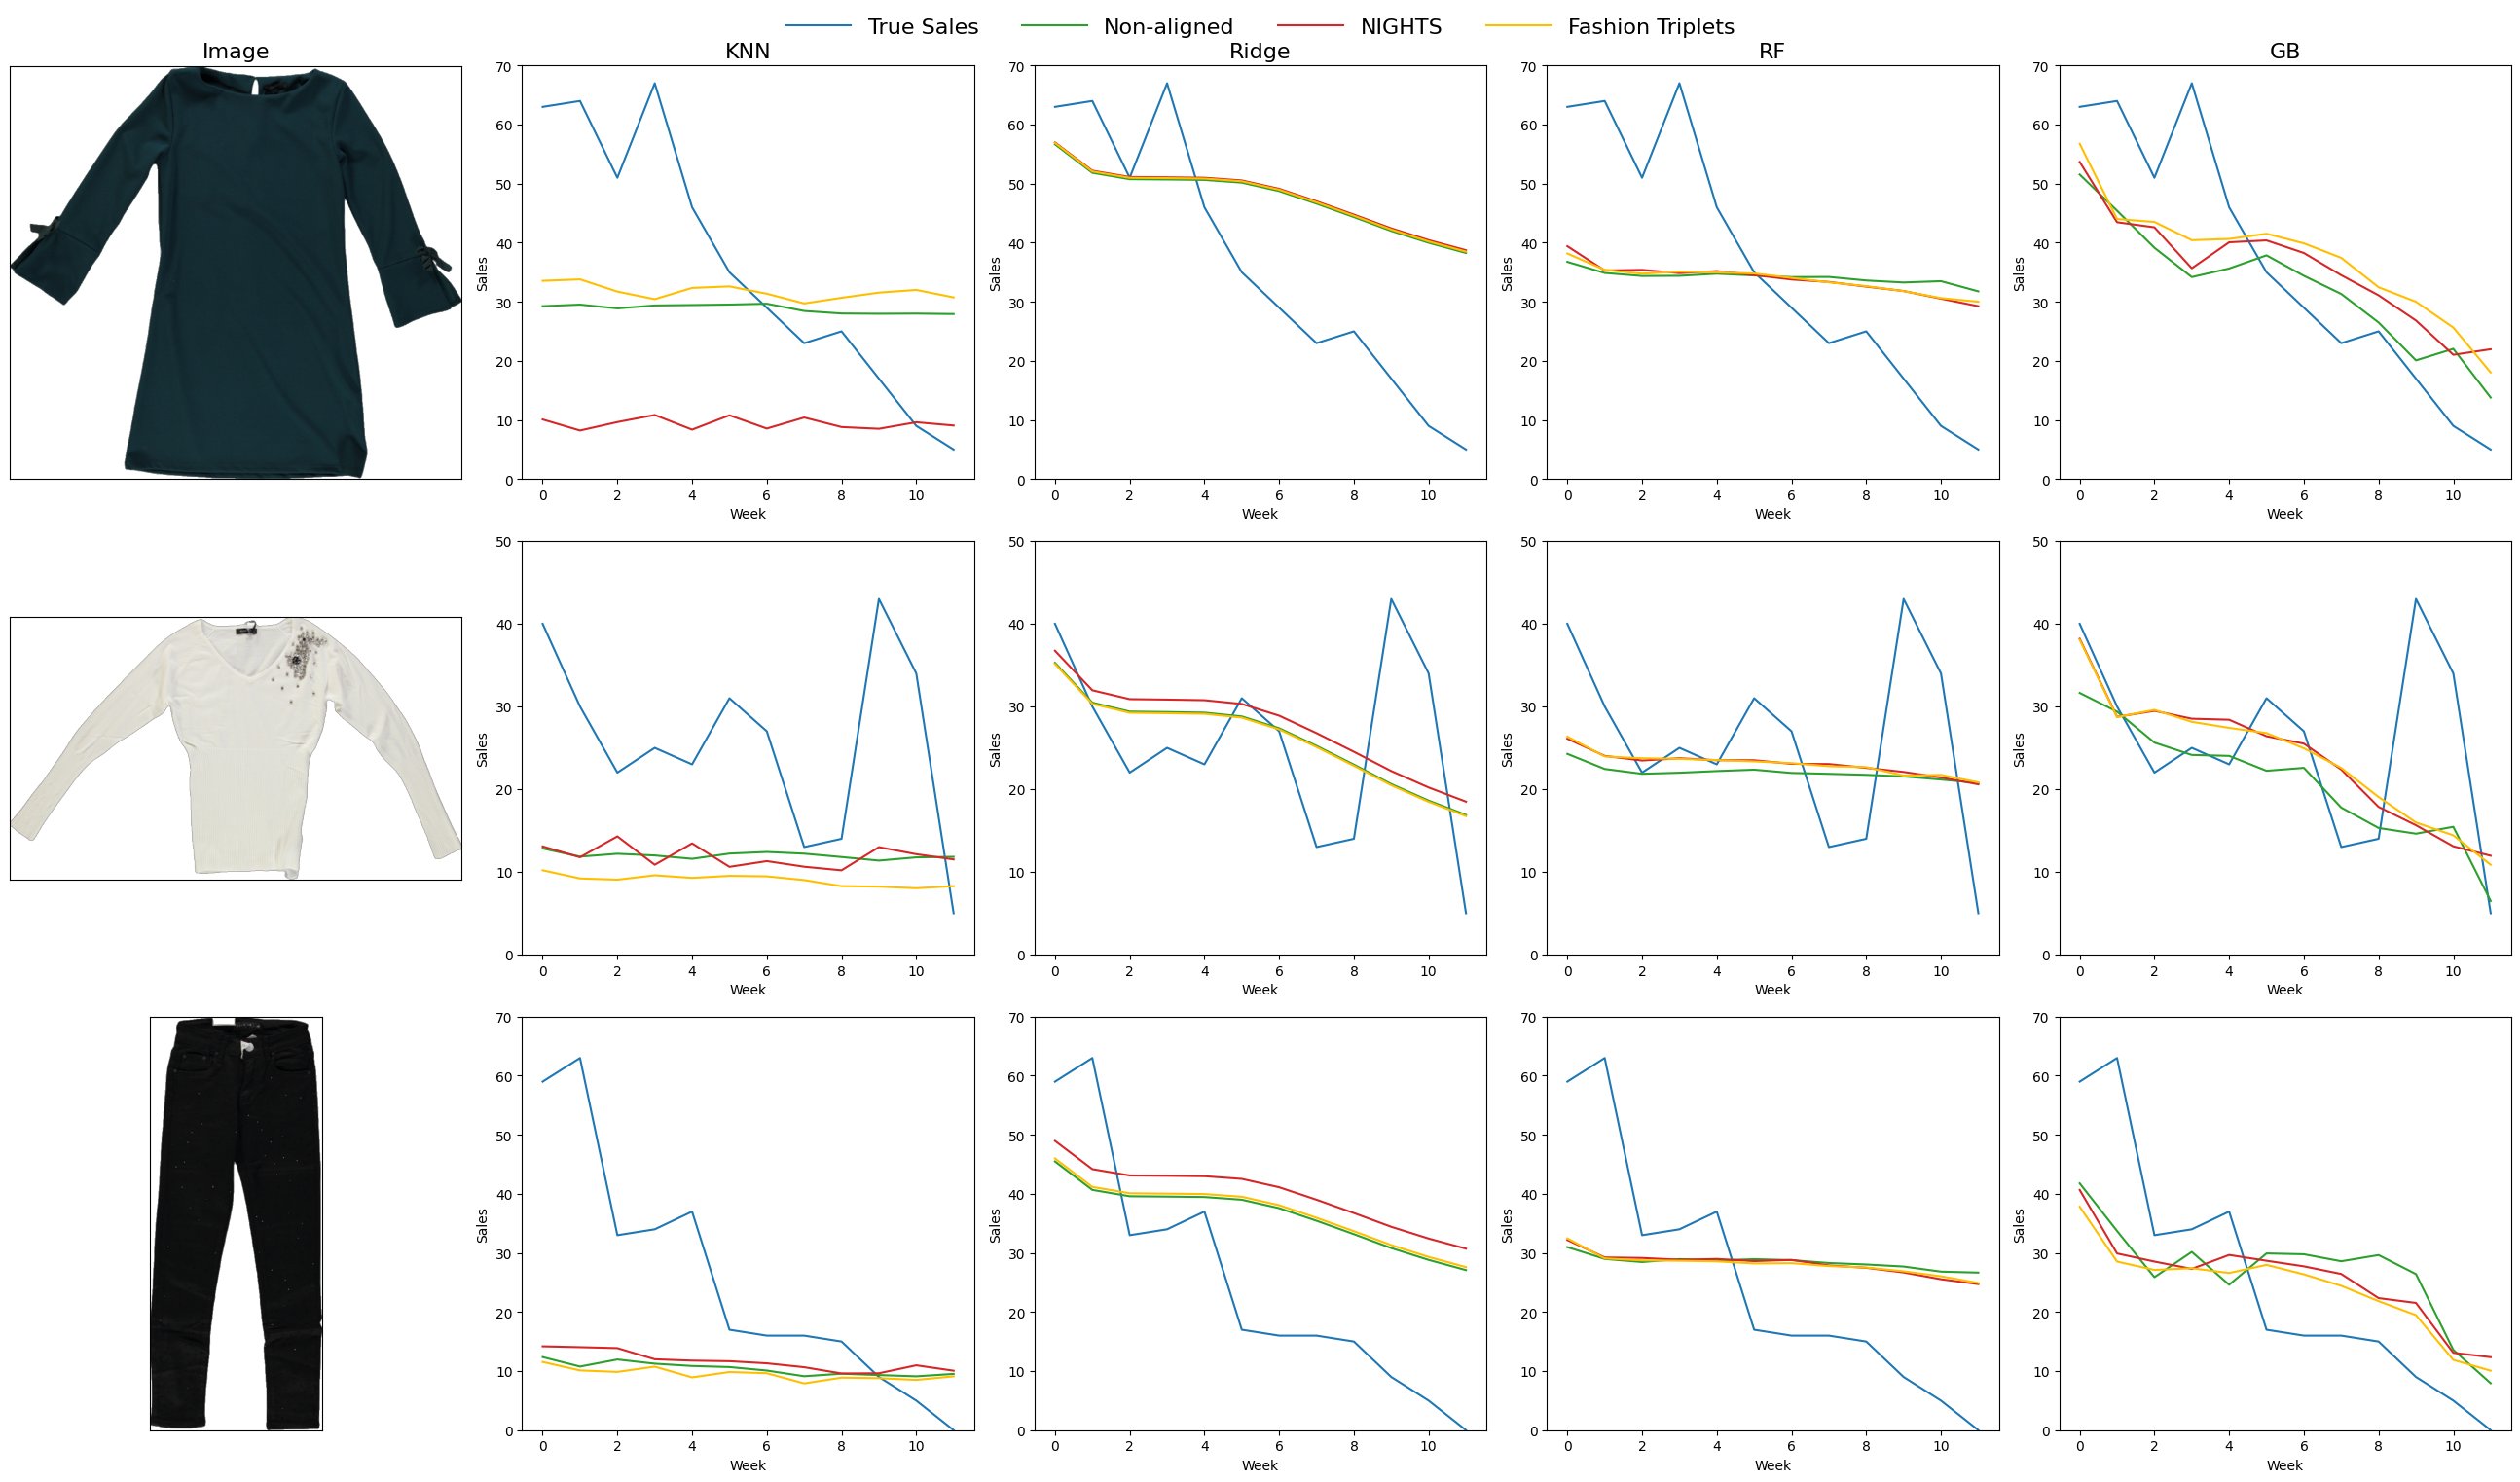

Figure saved to: /content/drive/MyDrive/perceptual-vits-fashion-forecasting/visualizations/prediction_examples_dinov1_lora.png


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

colors = {
    'true': '#1f77b4',   # blue
    'vanilla': '#2ca02c',   # green
    'nights': '#d62728',   # red
    'ft': '#ffbf00',   # yellow
}

items = [5577, 5481, 5490]

df_three = df[df['external_code'].isin(items)]
week = df_three['week'].unique()

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(26, 15))
plt.tight_layout()

axes[0,0].set_title("Image", fontsize=16)
axes[0,1].set_title("KNN", fontsize=16)
axes[0,2].set_title("Ridge", fontsize=16)
axes[0,3].set_title("RF", fontsize=16)
axes[0,4].set_title("GB", fontsize=16)

### First row ###
ax = axes[0, 0]
img1 = df[(df['external_code']== items[0]) & (df['week']==0)]['image_path'].values[0]
img1_path = os.path.join(PROJECT_ROOT, 'datasets', 'visuelle2', 'images', img1)
img1 = Image.open(img1_path)
ax.imshow(img1)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax = axes[0, 1]
ax.plot(week, df_three[df_three['external_code']== items[0]]['true_sales'], label='True Sales', color=colors['true'])
ax.plot(week, df_three[df_three['external_code']== items[0]]['vanilla_knn'], label='Non-aligned', color=colors['vanilla'])
ax.plot(week, df_three[df_three['external_code']== items[0]]['nights_knn'], label='NIGHTS', color=colors['nights'])
ax.plot(week, df_three[df_three['external_code']== items[0]]['ft_knn'], label='Fashion Triplets', color=colors['ft'])
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_ylim(0, 70)

ax = axes[0, 2]
ax.plot(week, df_three[df_three['external_code']== items[0]]['true_sales'], label='True Sales', color=colors['true'])
ax.plot(week, df_three[df_three['external_code']== items[0]]['vanilla_ridge'], label='Non-aligned', color=colors['vanilla'])
ax.plot(week, df_three[df_three['external_code']== items[0]]['nights_ridge'], label='NIGHTS', color=colors['nights'])
ax.plot(week, df_three[df_three['external_code']== items[0]]['ft_ridge'], label='Fashion Triplets', color=colors['ft'])
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_ylim(0, 70)

ax = axes[0, 3]
ax.plot(week, df_three[df_three['external_code']== items[0]]['true_sales'], label='True Sales', color=colors['true'])
ax.plot(week, df_three[df_three['external_code']== items[0]]['vanilla_rf'], label='Non-aligned', color=colors['vanilla'])
ax.plot(week, df_three[df_three['external_code']== items[0]]['nights_rf'], label='NIGHTS', color=colors['nights'])
ax.plot(week, df_three[df_three['external_code']== items[0]]['ft_rf'], label='Fashion Triplets', color=colors['ft'])
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_ylim(0, 70)

ax = axes[0, 4]
ax.plot(week, df_three[df_three['external_code']== items[0]]['true_sales'], label='True Sales', color=colors['true'])
ax.plot(week, df_three[df_three['external_code']== items[0]]['vanilla_gb'], label='Non-aligned', color=colors['vanilla'])
ax.plot(week, df_three[df_three['external_code']== items[0]]['nights_gb'], label='NIGHTS', color=colors['nights'])
ax.plot(week, df_three[df_three['external_code']== items[0]]['ft_gb'], label='Fashion Triplets', color=colors['ft'])
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_ylim(0, 70)

### Second row ###
ax = axes[1, 0]
img2 = df[(df['external_code']== items[1]) & (df['week']==0)]['image_path'].values[0]
img2_path = os.path.join(PROJECT_ROOT, 'datasets', 'visuelle2', 'images', img2)
img2 = Image.open(img2_path)
ax.imshow(img2)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax = axes[1, 1]
ax.plot(week, df_three[df_three['external_code']== items[1]]['true_sales'], label='True Sales', color=colors['true'])
ax.plot(week, df_three[df_three['external_code']== items[1]]['vanilla_knn'], label='Non-aligned', color=colors['vanilla'])
ax.plot(week, df_three[df_three['external_code']== items[1]]['nights_knn'], label='NIGHTS', color=colors['nights'])
ax.plot(week, df_three[df_three['external_code']== items[1]]['ft_knn'], label='Fashion Triplets', color=colors['ft'])
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_ylim(0, 50)

ax = axes[1, 2]
ax.plot(week, df_three[df_three['external_code']== items[1]]['true_sales'], label='True Sales', color=colors['true'])
ax.plot(week, df_three[df_three['external_code']== items[1]]['vanilla_ridge'], label='Non-aligned', color=colors['vanilla'])
ax.plot(week, df_three[df_three['external_code']== items[1]]['nights_ridge'], label='NIGHTS', color=colors['nights'])
ax.plot(week, df_three[df_three['external_code']== items[1]]['ft_ridge'], label='Fashion Triplets', color=colors['ft'])
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_ylim(0, 50)

ax = axes[1, 3]
ax.plot(week, df_three[df_three['external_code']== items[1]]['true_sales'], label='True Sales', color=colors['true'])
ax.plot(week, df_three[df_three['external_code']== items[1]]['vanilla_rf'], label='Non-aligned', color=colors['vanilla'])
ax.plot(week, df_three[df_three['external_code']== items[1]]['nights_rf'], label='NIGHTS', color=colors['nights'])
ax.plot(week, df_three[df_three['external_code']== items[1]]['ft_rf'], label='Fashion Triplets', color=colors['ft'])
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_ylim(0, 50)

ax = axes[1, 4]
ax.plot(week, df_three[df_three['external_code']== items[1]]['true_sales'], label='True Sales', color=colors['true'])
ax.plot(week, df_three[df_three['external_code']== items[1]]['vanilla_gb'], label='Non-aligned', color=colors['vanilla'])
ax.plot(week, df_three[df_three['external_code']== items[1]]['nights_gb'], label='NIGHTS', color=colors['nights'])
ax.plot(week, df_three[df_three['external_code']== items[1]]['ft_gb'], label='Fashion Triplets', color=colors['ft'])
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_ylim(0, 50)

### Third row ###
ax = axes[2, 0]
img3 = df[(df['external_code']== items[2]) & (df['week']==0)]['image_path'].values[0]
img3_path = os.path.join(PROJECT_ROOT, 'datasets', 'visuelle2', 'images', img3)
img3 = Image.open(img3_path)
ax.imshow(img3)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax = axes[2, 1]
ax.plot(week, df_three[df_three['external_code']== items[2]]['true_sales'], label='True Sales', color=colors['true'])
ax.plot(week, df_three[df_three['external_code']== items[2]]['vanilla_knn'], label='Non-aligned', color=colors['vanilla'])
ax.plot(week, df_three[df_three['external_code']== items[2]]['nights_knn'], label='NIGHTS', color=colors['nights'])
ax.plot(week, df_three[df_three['external_code']== items[2]]['ft_knn'], label='Fashion Triplets', color=colors['ft'])
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_ylim(0, 70)

ax = axes[2, 2]
ax.plot(week, df_three[df_three['external_code']== items[2]]['true_sales'], label='True Sales', color=colors['true'])
ax.plot(week, df_three[df_three['external_code']== items[2]]['vanilla_ridge'], label='Non-aligned', color=colors['vanilla'])
ax.plot(week, df_three[df_three['external_code']== items[2]]['nights_ridge'], label='NIGHTS', color=colors['nights'])
ax.plot(week, df_three[df_three['external_code']== items[2]]['ft_ridge'], label='Fashion Triplets', color=colors['ft'])
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_ylim(0, 70)

ax = axes[2, 3]
ax.plot(week, df_three[df_three['external_code']== items[2]]['true_sales'], label='True Sales', color=colors['true'])
ax.plot(week, df_three[df_three['external_code']== items[2]]['vanilla_rf'], label='Non-aligned', color=colors['vanilla'])
ax.plot(week, df_three[df_three['external_code']== items[2]]['nights_rf'], label='NIGHTS', color=colors['nights'])
ax.plot(week, df_three[df_three['external_code']== items[2]]['ft_rf'], label='Fashion Triplets', color=colors['ft'])
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_ylim(0, 70)

ax = axes[2, 4]
ax.plot(week, df_three[df_three['external_code']== items[2]]['true_sales'], label='True Sales', color=colors['true'])
ax.plot(week, df_three[df_three['external_code']== items[2]]['vanilla_gb'], label='Non-aligned', color=colors['vanilla'])
ax.plot(week, df_three[df_three['external_code']== items[2]]['nights_gb'], label='NIGHTS', color=colors['nights'])
ax.plot(week, df_three[df_three['external_code']== items[2]]['ft_gb'], label='Fashion Triplets', color=colors['ft'])
ax.set_xlabel('Week')
ax.set_ylabel('Sales')
ax.set_ylim(0, 70)

handles, labels = axes[0,1].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02),
    ncol=4,
    frameon=False,
    fontsize=16,
    handlelength=3,
    markerscale=1.5
)

viz_dir = os.path.join(PROJECT_ROOT, 'visualizations')
os.makedirs(viz_dir, exist_ok=True)

fig_path = os.path.join(
    viz_dir,
    'prediction_examples_dinov1_lora.png'
)

plt.tight_layout()
plt.savefig(fig_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Figure saved to: {fig_path}")